### Problem Statement
## Perform sentimental analysis:
### 1) Extract reviews of any product from ecommerce website like amazon
### 2) Perform emotion mining

## <a id='1'>1. Multi-page web-scraping</a>


In [ ]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [ ]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [ ]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [ ]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

<ipython-input-9-6e4322541d2b>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nGood budget 5G phone in 15k,I purchased OnePlus phone on Amazon. Delivery ...,11 October 2023
1,4.0,4.0 out of 5 stars\nVery good phone in 16 K of...,Very good and Stylish phone as compared to oth...,1 October 2023
2,4.0,4.0 out of 5 stars\nOverall performance,"Ok , so this phone is good but not best in seg...",21 September 2023
3,4.0,4.0 out of 5 stars\nGood phone except Camera q...,Phone performance is good but camera 📸 quality...,7 October 2023
4,4.0,4.0 out of 5 stars\nGreat,Everything is fine,11 October 2023
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nA good product to go with,It's been few months I am using this product. ...,27 July 2023
96,4.0,4.0 out of 5 stars\nGood 5g phone in this segment,Camera is avgPerformance is goodBattery goodIn...,6 August 2023
97,4.0,4.0 out of 5 stars\nOverall Good,The only drawback of this phone is that you ca...,29 July 2023
98,4.0,4.0 out of 5 stars\nNice 👍👍🙂 phone best camera...,The media could not be loaded.\n ...,31 July 2023


In [ ]:
from google.colab import files
df.to_csv('output.csv', encoding = 'utf-8-sig')
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.1. __<a href='#0.1' target='_self'>Table of Contents:</a>__

## <a id='2'>2. Import Libraries</a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

warnings.filterwarnings("ignore", category=DeprecationWarning)

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


0.1. __<a href='#0.1' target='_self'>Table of Contents:</a>__

In [ ]:
reviews=pd.read_csv("output.csv")

In [ ]:
reviews

,Unnamed: 0,Rating,Title,Review,Review_Date
0,0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022
1,1,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023
2,2,4.0,Not good not bad,"I am posting a review after 7 days of used,Pro...",28 March 2023
3,3,4.0,Value for money,"This phone is value for money. Meanwhile, you ...",18 April 2023
4,4,4.0,Nice product,I purchased it 2 months before. Camera quality...,18 April 2023
...,...,...,...,...,...
4995,4995,4.0,"Light weight, smooth, Camera is Ok for normal ...","Light weight, smooth, Camera is Ok for normal ...",16 March 2022
4996,4996,3.0,Good,Good,31 August 2022
4997,4997,4.0,Good,Ya .I like it..all specifications are good.its...,3 April 2022
4998,4998,5.0,Good,Good,29 October 2022


## <a id='3'>3. Data Exploration</a>

In [ ]:
reviews.Rating.describe()

count    5000.000000
mean        4.138600
std         0.872435
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

#### Number of Words

In [ ]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,I've purchased the 6GB version of this phone w...,299
1,I will try to keep this review short. This rev...,216
2,"I am posting a review after 7 days of used,Pro...",129
3,"This phone is value for money. Meanwhile, you ...",32
4,I purchased it 2 months before. Camera quality...,18


#### Number of characters

In [ ]:
reviews['char_count'] = reviews['Review'].str.len()
reviews[['Review','char_count']].head()

,Review,char_count
0,I've purchased the 6GB version of this phone w...,1715.0
1,I will try to keep this review short. This rev...,1189.0
2,"I am posting a review after 7 days of used,Pro...",700.0
3,"This phone is value for money. Meanwhile, you ...",192.0
4,I purchased it 2 months before. Camera quality...,106.0


#### Average Word Length

In [ ]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,I've purchased the 6GB version of this phone w...,4.755034
1,I will try to keep this review short. This rev...,4.509259
2,"I am posting a review after 7 days of used,Pro...",4.434109
3,"This phone is value for money. Meanwhile, you ...",5.031250
4,I purchased it 2 months before. Camera quality...,4.944444


#### Number of stopwords

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,I've purchased the 6GB version of this phone w...,128
1,I will try to keep this review short. This rev...,94
2,"I am posting a review after 7 days of used,Pro...",53
3,"This phone is value for money. Meanwhile, you ...",10
4,I purchased it 2 months before. Camera quality...,4


#### Number of special characters

In [ ]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,I've purchased the 6GB version of this phone w...,0
1,I will try to keep this review short. This rev...,0
2,"I am posting a review after 7 days of used,Pro...",0
3,"This phone is value for money. Meanwhile, you ...",0
4,I purchased it 2 months before. Camera quality...,0


#### Number of numerics

In [ ]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,I've purchased the 6GB version of this phone w...,2
1,I will try to keep this review short. This rev...,0
2,"I am posting a review after 7 days of used,Pro...",2
3,"This phone is value for money. Meanwhile, you ...",0
4,I purchased it 2 months before. Camera quality...,1


#### Number of Uppercase words

In [ ]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,I've purchased the 6GB version of this phone w...,4
1,I will try to keep this review short. This rev...,3
2,"I am posting a review after 7 days of used,Pro...",2
3,"This phone is value for money. Meanwhile, you ...",2
4,I purchased it 2 months before. Camera quality...,1


In [ ]:
reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

####  Spelling correction
We’ve all seen tweets with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words.

To achieve this we will use the textblob library. If you are not familiar with it, you can check my previous article on ‘NLP for beginners using textblob’

In [ ]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I've purchased the 6GB version of this phone w...
1    I will try to keep this review short. His revi...
2    I am posting a review after 7 days of used,Gro...
3    His phone is value for money. Meanwhile, you c...
4    I purchased it 2 months before. Camera quality...
Name: Review, dtype: object

## <a id='4'>4. Feature Engineering</a>

In [ ]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0       19
1       12
2       28
3       18
4       18
        ..
4995    16
4996    31
4997     3
4998    29
4999    14
Name: Review_Date, Length: 5000, dtype: object 
 0       December
1        January
2          March
3          April
4          April
          ...   
4995       March
4996      August
4997       April
4998     October
4999        June
Name: Review_Date, Length: 5000, dtype: object 
 0       2022
1       2023
2       2023
3       2023
4       2023
        ... 
4995    2022
4996    2022
4997    2022
4998    2022
4999    2022
Name: Review_Date, Length: 5000, dtype: object


### Spliting Review Date into Three seperate Columns (Year,Month,Day)

In [ ]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,19,December,2022
1,12,January,2023
2,28,March,2023
3,18,April,2023
4,18,April,2023
...,...,...,...
4995,16,March,2022
4996,31,August,2022
4997,3,April,2022
4998,29,October,2022


In [ ]:
df

,Unnamed: 0,Rating,Title,Review,Review_Date,Date,Month,Year
0,0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022,19,December,2022
1,1,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023,12,January,2023
2,2,4.0,Not good not bad,"I am posting a review after 7 days of used,Pro...",28 March 2023,28,March,2023
3,3,4.0,Value for money,"This phone is value for money. Meanwhile, you ...",18 April 2023,18,April,2023
4,4,4.0,Nice product,I purchased it 2 months before. Camera quality...,18 April 2023,18,April,2023
...,...,...,...,...,...,...,...,...
4995,4995,4.0,"Light weight, smooth, Camera is Ok for normal ...","Light weight, smooth, Camera is Ok for normal ...",16 March 2022,16,March,2022
4996,4996,3.0,Good,Good,31 August 2022,31,August,2022
4997,4997,4.0,Good,Ya .I like it..all specifications are good.its...,3 April 2022,3,April,2022
4998,4998,5.0,Good,Good,29 October 2022,29,October,2022


In [ ]:
df.Month.value_counts()

November     391
October      360
March        232
April        223
August       221
December     206
July         186
September    183
January      181
June         166
February     143
May          108
Name: Month, dtype: int64

### Change 'month' from words to numbers for easier analysis

In [ ]:
order={'Month':{'January':1,'February':2,'March':3,'April':4,'May':5,'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,12
1,1
2,3
3,4
4,4
...,...
4995,3
4996,8
4997,4
4998,10


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2600 non-null   int64  
 1   Rating       2600 non-null   float64
 2   Title        2599 non-null   object 
 3   Review       2490 non-null   object 
 4   Review_Date  2600 non-null   object 
 5   Date         2600 non-null   object 
 6   Month        2600 non-null   int64  
 7   Year         2600 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 182.8+ KB


In [ ]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2600 non-null   int64  
 1   Rating       2600 non-null   float64
 2   Title        2599 non-null   object 
 3   Review       2490 non-null   object 
 4   Review_Date  2600 non-null   object 
 5   Date         2600 non-null   int64  
 6   Month        2600 non-null   int64  
 7   Year         2600 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 182.8+ KB


### Dropping the Original Columns after splitting the data

In [ ]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Unnamed: 0,Rating,Title,Review,Date,Month,Year
0,0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19,12,2022
1,1,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12,1,2023
2,2,4.0,Not good not bad,"I am posting a review after 7 days of used,Pro...",28,3,2023
3,3,4.0,Value for money,"This phone is value for money. Meanwhile, you ...",18,4,2023
4,4,4.0,Nice product,I purchased it 2 months before. Camera quality...,18,4,2023


In [ ]:
df

,Unnamed: 0,Rating,Title,Review,Review_Date,Date,Month,Year
0,0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022,19,December,2022
1,1,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023,12,January,2023
2,2,4.0,Not good not bad,"I am posting a review after 7 days of used,Pro...",28 March 2023,28,March,2023
3,3,4.0,Value for money,"This phone is value for money. Meanwhile, you ...",18 April 2023,18,April,2023
4,4,4.0,Nice product,I purchased it 2 months before. Camera quality...,18 April 2023,18,April,2023
...,...,...,...,...,...,...,...,...
4995,4995,4.0,"Light weight, smooth, Camera is Ok for normal ...","Light weight, smooth, Camera is Ok for normal ...",16 March 2022,16,March,2022
4996,4996,3.0,Good,Good,31 August 2022,31,August,2022
4997,4997,4.0,Good,Ya .I like it..all specifications are good.its...,3 April 2022,3,April,2022
4998,4998,5.0,Good,Good,29 October 2022,29,October,2022


0.1. __<a href='#0.1' target='_self'>Table of Contents:</a>__

## <a id='5'>5. Data Visualization</a>

#### date versus review count

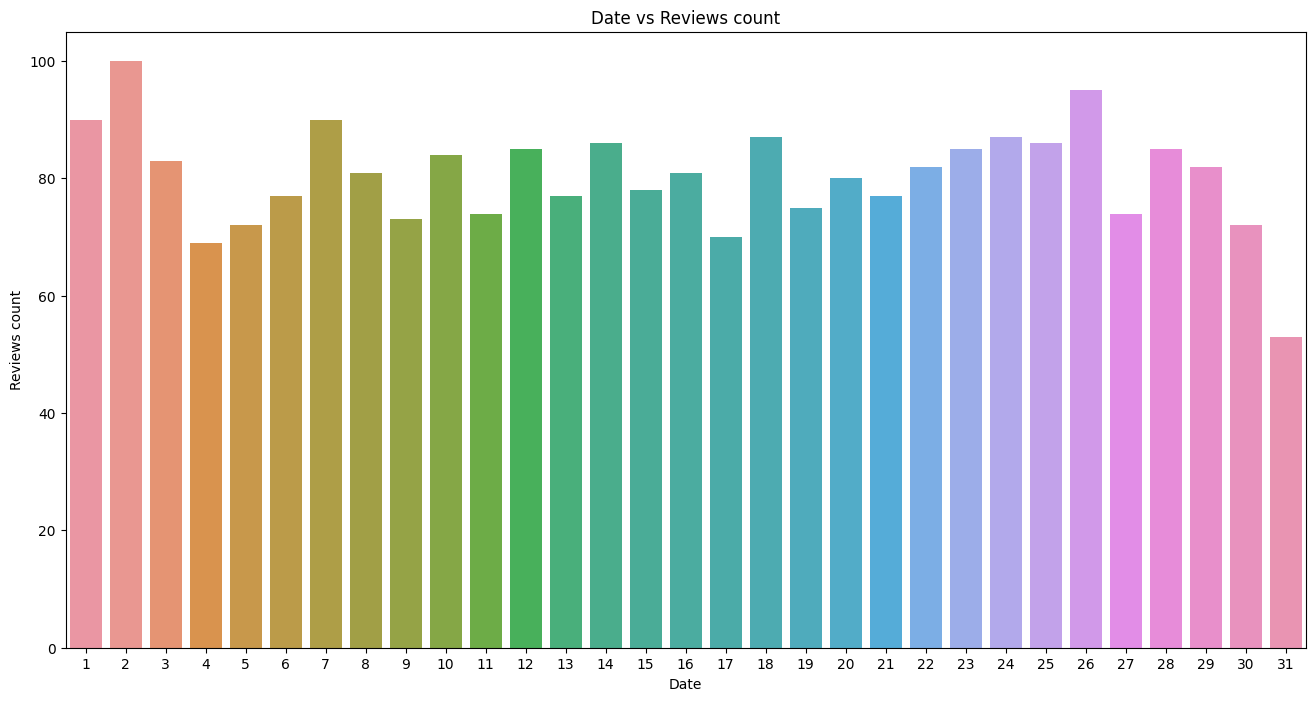

In [ ]:
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

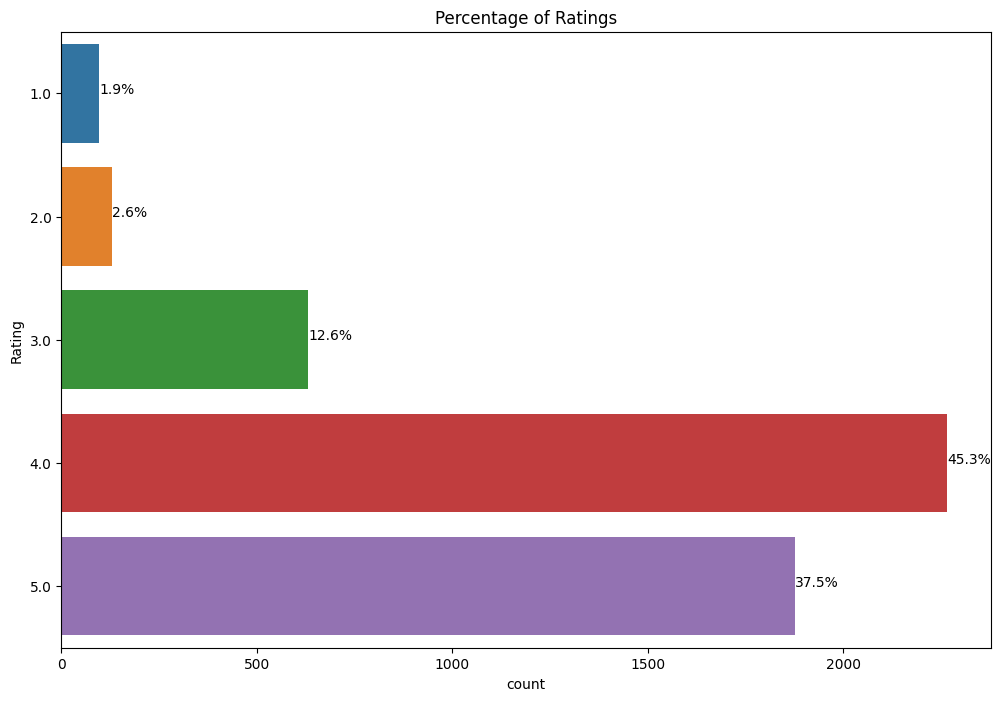

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

0.1. __<a href='#0.1' target='_self'>Table of Contents:</a>__

##  <a id='6'>6. BasicText Preprocessing</a>
### <a id='6A'>A. For Sentiment Analysis</a>
##### keeping the DataFrame intact and each tweets separate from each other

In [ ]:
data = df[['Review']]
data

,Review
0,I've purchased the 6GB version of this phone w...
1,I will try to keep this review short. This rev...
2,"I am posting a review after 7 days of used,Pro..."
3,"This phone is value for money. Meanwhile, you ..."
4,I purchased it 2 months before. Camera quality...
...,...
4995,"Light weight, smooth, Camera is Ok for normal ..."
4996,Good
4997,Ya .I like it..all specifications are good.its...
4998,Good


In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [ ]:
data

,Review
0,i've purchased 6gb version phone comes extenda...
1,i try keep review short. this review perspecti...
2,"i posting review 7 days used,pros :battery goo..."
3,"this phone value money. meanwhile, can't exper..."
4,i purchased 2 months before. camera quality & ...
...,...
4995,"light weight, smooth, camera ok normal person,..."
4996,good
4997,ya .i like it..all specifications good.its sma...
4998,good


In [ ]:
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

In [ ]:
corpus=[]

In [ ]:
def clean_text(text):
    cleaned = text.translate(str.maketrans('', '', string.punctuation)).lower()
    words = [lemmatizer.lemmatize(word) for word in cleaned.split()]
    cleaned_words = [word for word in words if word not in stop_words]
    cleaned_sentence = ' '.join(cleaned_words)
    return cleaned_sentence

In [ ]:
data['cleaned']=data['Review'].apply(clean_text)

In [ ]:
dataframe=data.copy()

In [ ]:
dataframe

,Review,cleaned
0,i've purchased 6gb version phone comes extenda...,ive purchased 6gb version phone come extendabl...
1,i try keep review short. this review perspecti...,try keep review short review perspective avera...
2,"i posting review 7 days used,pros :battery goo...",posting review 7 day usedpros battery good usi...
3,"this phone value money. meanwhile, can't exper...",phone value money meanwhile cant experience on...
4,i purchased 2 months before. camera quality & ...,purchased 2 month camera quality battery backu...
...,...,...
4995,"light weight, smooth, camera ok normal person,...",light weight smooth camera ok normal person ni...
4996,good,good
4997,ya .i like it..all specifications good.its sma...,ya like itall specification goodits small nega...
4998,good,good


0.1. __<a href='#0.1' target='_self'>Table of Contents:</a>__

## <a id='7'>7. Text Pre-processing Techniques</a>
### <a id='7A'>A. Pre-processing 'Key Words'</a>
#### <a id='7Aa'>a. Removing '@names'</a>

In [ ]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [ ]:
dataframe['cleaned'] = np.vectorize(remove_pattern)(dataframe['cleaned'], "@[\w]*")
dataframe.head(10)

,Review,cleaned
0,i've purchased 6gb version phone comes extenda...,ive purchased 6gb version phone come extendabl...
1,i try keep review short. this review perspecti...,try keep review short review perspective avera...
2,"i posting review 7 days used,pros :battery goo...",posting review 7 day usedpros battery good usi...
3,"this phone value money. meanwhile, can't exper...",phone value money meanwhile cant experience on...
4,i purchased 2 months before. camera quality & ...,purchased 2 month camera quality battery backu...
5,"i loved colour (sky blue), looked exceptional ...",loved colour sky blue looked exceptional opene...
6,"worst experience, product working properly, au...",worst experience product working properly auto...
7,this definitely budget branded phone 📱 1 month...,definitely budget branded phone 📱 1 month 22 d...
8,all function brand run smoothly,function brand run smoothly
9,it good. organizing contact bit cozy,good organizing contact bit cozy


#### <a id='7Ab'>b. Removing links (http | https)</a>

In [ ]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.cleaned.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['cleaned'] = cleaned_reviews
dataframe.head(10)

,Review,cleaned
0,i've purchased 6gb version phone comes extenda...,ive purchased 6gb version phone come extendabl...
1,i try keep review short. this review perspecti...,try keep review short review perspective avera...
2,"i posting review 7 days used,pros :battery goo...",posting review 7 day usedpros battery good usi...
3,"this phone value money. meanwhile, can't exper...",phone value money meanwhile cant experience on...
4,i purchased 2 months before. camera quality & ...,purchased 2 month camera quality battery backu...
5,"i loved colour (sky blue), looked exceptional ...",loved colour sky blue looked exceptional opene...
6,"worst experience, product working properly, au...",worst experience product working properly auto...
7,this definitely budget branded phone 📱 1 month...,definitely budget branded phone 📱 1 month 22 d...
8,all function brand run smoothly,function brand run smoothly
9,it good. organizing contact bit cozy,good organizing contact bit cozy


#### <a id='7Ac'>c. Removing Review with empty text</a>

In [ ]:
dataframe = dataframe[dataframe['cleaned']!='']
dataframe.head(10)

,Review,cleaned
0,i've purchased 6gb version phone comes extenda...,ive purchased 6gb version phone come extendabl...
1,i try keep review short. this review perspecti...,try keep review short review perspective avera...
2,"i posting review 7 days used,pros :battery goo...",posting review 7 day usedpros battery good usi...
3,"this phone value money. meanwhile, can't exper...",phone value money meanwhile cant experience on...
4,i purchased 2 months before. camera quality & ...,purchased 2 month camera quality battery backu...
5,"i loved colour (sky blue), looked exceptional ...",loved colour sky blue looked exceptional opene...
6,"worst experience, product working properly, au...",worst experience product working properly auto...
7,this definitely budget branded phone 📱 1 month...,definitely budget branded phone 📱 1 month 22 d...
8,all function brand run smoothly,function brand run smoothly
9,it good. organizing contact bit cozy,good organizing contact bit cozy


#### <a id='7Ad'>d. Dropping duplicate rows</a>

In [ ]:
dataframe.drop_duplicates(subset=['cleaned'], keep=False)
dataframe.head(10)

,Review,cleaned
0,i've purchased 6gb version phone comes extenda...,ive purchased 6gb version phone come extendabl...
1,i try keep review short. this review perspecti...,try keep review short review perspective avera...
2,"i posting review 7 days used,pros :battery goo...",posting review 7 day usedpros battery good usi...
3,"this phone value money. meanwhile, can't exper...",phone value money meanwhile cant experience on...
4,i purchased 2 months before. camera quality & ...,purchased 2 month camera quality battery backu...
5,"i loved colour (sky blue), looked exceptional ...",loved colour sky blue looked exceptional opene...
6,"worst experience, product working properly, au...",worst experience product working properly auto...
7,this definitely budget branded phone 📱 1 month...,definitely budget branded phone 📱 1 month 22 d...
8,all function brand run smoothly,function brand run smoothly
9,it good. organizing contact bit cozy,good organizing contact bit cozy


#### <a id='7Ae'>e. Resetting index</a>
It seems that our index needs to be reset, since after removal of some rows, some index values are missing, which may cause problem in future operations.

In [ ]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Review,cleaned
0,i've purchased 6gb version phone comes extenda...,ive purchased 6gb version phone come extendabl...
1,i try keep review short. this review perspecti...,try keep review short review perspective avera...
2,"i posting review 7 days used,pros :battery goo...",posting review 7 day usedpros battery good usi...
3,"this phone value money. meanwhile, can't exper...",phone value money meanwhile cant experience on...
4,i purchased 2 months before. camera quality & ...,purchased 2 month camera quality battery backu...
5,"i loved colour (sky blue), looked exceptional ...",loved colour sky blue looked exceptional opene...
6,"worst experience, product working properly, au...",worst experience product working properly auto...
7,this definitely budget branded phone 📱 1 month...,definitely budget branded phone 📱 1 month 22 d...
8,all function brand run smoothly,function brand run smoothly
9,it good. organizing contact bit cozy,good organizing contact bit cozy


#### <a id='7Af'>f. Removing Punctuations, Numbers and Special characters</a>
This step should not be followed if we also want to do sentiment analysis on __key phrases__ as well, because semantic meaning in a sentence needs to be present. So here we will create one additional column 'absolute_tidy_tweets' which will contain absolute tidy words which can be further used for sentiment analysis on __key words__.

In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
dataframe['cleaned'] = dataframe['cleaned'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Review,cleaned
0,i've purchased 6gb version phone comes extenda...,ive purchased version phone come extendable ...
1,i try keep review short. this review perspecti...,try keep review short review perspective avera...
2,"i posting review 7 days used,pros :battery goo...",posting review day usedpros battery good usin...
3,"this phone value money. meanwhile, can't exper...",phone value money meanwhile cant experience on...
4,i purchased 2 months before. camera quality & ...,purchased month camera quality battery backup...
5,"i loved colour (sky blue), looked exceptional ...",loved colour sky blue looked exceptional opene...
6,"worst experience, product working properly, au...",worst experience product working properly auto...
7,this definitely budget branded phone 📱 1 month...,definitely budget branded phone 📱 month day ...
8,all function brand run smoothly,function brand run smoothly
9,it good. organizing contact bit cozy,good organizing contact bit cozy


#### <a id='7Ag'>g. Function to remove emoji</a>

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
dataframe['cleaned']=dataframe['cleaned'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Review,cleaned
0,i've purchased 6gb version phone comes extenda...,ive purchased version phone come extendable ...
1,i try keep review short. this review perspecti...,try keep review short review perspective avera...
2,"i posting review 7 days used,pros :battery goo...",posting review day usedpros battery good usin...
3,"this phone value money. meanwhile, can't exper...",phone value money meanwhile cant experience on...
4,i purchased 2 months before. camera quality & ...,purchased month camera quality battery backup...
5,"i loved colour (sky blue), looked exceptional ...",loved colour sky blue looked exceptional opene...
6,"worst experience, product working properly, au...",worst experience product working properly auto...
7,this definitely budget branded phone 📱 1 month...,definitely budget branded phone month day u...
8,all function brand run smoothly,function brand run smoothly
9,it good. organizing contact bit cozy,good organizing contact bit cozy


In [ ]:
dataframe['tokenized_tweets'] = dataframe['cleaned'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Review,cleaned,tokenized_tweets
0,i've purchased 6gb version phone comes extenda...,ive purchased version phone come extendable ...,"[ive, purchased, version, phone, come, extenda..."
1,i try keep review short. this review perspecti...,try keep review short review perspective avera...,"[try, keep, review, short, review, perspective..."
2,"i posting review 7 days used,pros :battery goo...",posting review day usedpros battery good usin...,"[posting, review, day, usedpros, battery, good..."
3,"this phone value money. meanwhile, can't exper...",phone value money meanwhile cant experience on...,"[phone, value, money, meanwhile, cant, experie..."
4,i purchased 2 months before. camera quality & ...,purchased month camera quality battery backup...,"[purchased, month, camera, quality, battery, b..."
5,"i loved colour (sky blue), looked exceptional ...",loved colour sky blue looked exceptional opene...,"[loved, colour, sky, blue, looked, exceptional..."
6,"worst experience, product working properly, au...",worst experience product working properly auto...,"[worst, experience, product, working, properly..."
7,this definitely budget branded phone 📱 1 month...,definitely budget branded phone month day u...,"[definitely, budget, branded, phone, month, da..."
8,all function brand run smoothly,function brand run smoothly,"[function, brand, run, smoothly]"
9,it good. organizing contact bit cozy,good organizing contact bit cozy,"[good, organizing, contact, bit, cozy]"


In [ ]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

#### <a id='7Ah'>h. Removing Stop words</a>
With the same reason we mentioned above, we won't perform this on 'Clean-Review' column, because it needs to be used for __key_phrases__ sentiment analysis.

In [ ]:
import codecs
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [ ]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [ ]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    words_without_stopwords = [word for word in row.cleaned.split() if not word in stopwords_set and '#' not in word.lower()]
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Review,cleaned,Clean_Reviews
0,i've purchased 6gb version phone comes extenda...,ive purchased version phone come extendable ...,ive purchased version phone come extendable gb...
1,i try keep review short. this review perspecti...,try keep review short review perspective avera...,try keep review short review perspective avera...
2,"i posting review 7 days used,pros :battery goo...",posting review day usedpros battery good usin...,posting review day usedpros battery good using...
3,"this phone value money. meanwhile, can't exper...",phone value money meanwhile cant experience on...,phone value money meanwhile cant experience on...
4,i purchased 2 months before. camera quality & ...,purchased month camera quality battery backup...,purchased month camera quality battery backup ...
5,"i loved colour (sky blue), looked exceptional ...",loved colour sky blue looked exceptional opene...,loved colour sky blue looked exceptional opene...
6,"worst experience, product working properly, au...",worst experience product working properly auto...,worst experience product working properly auto...
7,this definitely budget branded phone 📱 1 month...,definitely budget branded phone month day u...,definitely budget branded phone month day use ...
8,all function brand run smoothly,function brand run smoothly,function brand run smoothly
9,it good. organizing contact bit cozy,good organizing contact bit cozy,good organizing contact bit cozy


#### <a id='7Ai'>i. Tokenize *'Clean_Reviews'*</a>  

In [ ]:
TextBlob(dataframe['cleaned'][1]).words

WordList(['try', 'keep', 'review', 'short', 'review', 'perspective', 'average', 'user', 'believe', 'buy', 'phone', 'start', 'use', 'change', 'adjust', 'without', 'complaining', 'muchthere', 'always', 'better', 'device', 'price', 'use', 'tool', 'nothing', 'camera', 'pretty', 'good', 'con', 'software', 'sweet', 'little', 'feature', 'one', 'plus', 'make', 'negative', 'speed', 'power', 'run', 'apps', 'people', 'use', 'generally', 'without', 'build', 'quality', 'good', 'well', 'given', 'going', 'use', 'sort', 'case', 'con', 'see', 'battery', 'need', 'charge', 'twice', 'day', 'browse', 'internet', 'use', 'camera', 'time', 'watch', 'youtube', 'instagram', 'facebook', 'medium', 'apps', 'like', 'hour', 'two', 'mid', 'brightness', 'maximum', 'achievable', 'screen', 'time', 'around', 'hour', 'given', 'high', 'speed', 'charger', 'battery', 'really', 'issuedo', 'tweakings', 'around', 'setting', 'delete', 'preinstalled', 'apps', 'stop', 'unnecessary', 'apps', 'background', 'easily', 'achieve', 'plus

In [ ]:
tokenized_review = dataframe['cleaned'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [ive, purchased, version, phone, come, extenda...
1    [try, keep, review, short, review, perspective...
2    [posting, review, day, usedpros, battery, good...
3    [phone, value, money, meanwhile, cant, experie...
4    [purchased, month, camera, quality, battery, b...
5    [loved, colour, sky, blue, looked, exceptional...
6    [worst, experience, product, working, properly...
7    [definitely, budget, branded, phone, month, da...
8                     [function, brand, run, smoothly]
9               [good, organizing, contact, bit, cozy]
Name: cleaned, dtype: object

#### <a id='7Ai'>j. Converting words to Stemmer</a>

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [ ]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['cleaned'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,ive purchas version phone come extend gb ram v...
1,tri keep review short review perspect averag u...
2,post review day usedpro batteri good use mobil...
3,phone valu money meanwhil cant experi one plus...
4,purchas month camera qualiti batteri backup go...
...,...
2588,light weight smooth camera ok normal person ni...
2589,good
2590,ya like ital specif goodit small negat front c...
2591,good


#### <a id='7Ak'>k. Converting words to Lemma</a>

In [ ]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['cleaned'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,stemmed
0,ive purchased version phone come extendable gb...
1,try keep review short review perspective avera...
2,posting review day usedpros battery good using...
3,phone value money meanwhile cant experience on...
4,purchased month camera quality battery backup ...
...,...
2588,light weight smooth camera ok normal person ni...
2589,good
2590,ya like itall specification goodits small nega...
2591,good


0.1. __<a href='#0.1' target='_self'>Table of Contents:</a>__

## <a id='8'>8. Basic Feature Extaction</a>
### <a id='8Aa'>A. **Applying bag of Words without N grams**</a>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.cleaned)

In [ ]:
print(cv.get_feature_names_out()[109:200])

['always' 'amazing' 'amazingcamera' 'amazon' 'amazone' 'amazonin'
 'amazonmy' 'amazonthank' 'amazonvery' 'ambient' 'amezing'
 'amezingcharging' 'amezon' 'amezonbattery' 'amloiedover' 'amo' 'amoled'
 'amolid' 'among' 'amount' 'ample' 'andbcamera' 'andif' 'andorid'
 'android' 'androidbattery' 'andthe' 'angle' 'animation' 'announce'
 'announces' 'annoying' 'another' 'answer' 'answering' 'antutu' 'anybody'
 'anymore' 'anyone' 'anything' 'anytimeoneplus' 'anyway' 'anyways'
 'anywehe' 'anywhen' 'anywhere' 'aowsome' 'ap' 'apart' 'app' 'appear'
 'appearance' 'appearanceoverall' 'apple' 'application' 'applied'
 'applies' 'applying' 'appointment' 'appoverall' 'appreciated' 'approx'
 'approximate' 'apps' 'appshighly' 'appsits' 'appx' 'apr' 'april' 'aprrox'
 'apt' 'apx' 'arch' 'area' 'areabut' 'areback' 'arepros' 'aresome'
 'around' 'arrange' 'arrangement' 'artificial' 'arun' 'ask' 'asked' 'asks'
 'aslo' 'aspect' 'aspectoccasion' 'aspectsand' 'assembled']


In [ ]:
print(cv.get_feature_names_out()[:100])

['aacha' 'aaj' 'aanouncementcamera' 'aaplog' 'aati' 'aatiisse' 'aaya'
 'aayega' 'ab' 'able' 'abnd' 'aboutoverall' 'above' 'absent' 'absentfront'
 'absolutely' 'absolutelybut' 'absolutelynot' 'accept' 'acceptablecamera'
 'accepted' 'accessible' 'accessory' 'accha' 'accidental' 'accidently'
 'accomodate' 'according' 'accordingbrand' 'account' 'accurate' 'acha'
 'achcha' 'achchha' 'ache' 'achha' 'achhe' 'achi' 'achievable' 'achieve'
 'achieved' 'across' 'action' 'activate' 'activated' 'actual' 'actually'
 'ad' 'adamant' 'adapter' 'add' 'added' 'adding' 'addition' 'addon'
 'address' 'adjust' 'adjusting' 'adjustment' 'advance' 'advanced'
 'advantage' 'advantagescamera' 'advertised' 'advertising' 'advice'
 'advise' 'afet' 'affect' 'afford' 'affordable' 'againi' 'againit'
 'againoverall' 'againthen' 'aged' 'agent' 'agentsrest' 'aggregation'
 'agin' 'agni' 'ago' 'ah' 'ahead' 'ai' 'aince' 'albeit' 'alert' 'alexa'
 'alignment' 'all' 'allow' 'allram' 'allright' 'allrounder' 'alls'
 'almost' 'alon

In [ ]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### <a id='8Ba'>B. **CountVectorizer with N-grams (Bigrams & Trigrams)**</a>

In [ ]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['cleaned'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/2593 [00:00<?, ?it/s]

In [ ]:
corpus[3]

'phone valu money meanwhil cant experi one plu charm camera qualiti averag connect speed slightli le connect speed phone'

In [ ]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

(2593, 5000)

In [ ]:
cv.get_feature_names_out()[:20]

array(['aacha', 'ab', 'abl', 'absolut', 'accept', 'accessori', 'accha',
       'accident', 'accord', 'accord price', 'accur', 'acha', 'achi',
       'achiev', 'activ', 'actual', 'ad', 'adapt', 'add', 'adjust'],
      dtype=object)

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,aacha,ab,abl,absolut,accept,accessori,accha,accident,accord,accord price,...,yea,yeah,year,year use,yesterday,yet,youtub,youtub instagram,zero,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### <a id='8Ca'>C. **TF-IDF Vectorizer**</a>

In [ ]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['cleaned'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/2593 [00:00<?, ?it/s]

In [ ]:
corpus[4]

'purchas month camera qualiti batteri backup good other perform good'

In [ ]:
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [ ]:
X.shape

(2593, 5000)

In [ ]:
tfidf_v.get_feature_names_out()[:20]

array(['aacha', 'ab', 'abl', 'absolut', 'accept', 'accessori', 'accha',
       'accident', 'accord', 'accord price', 'accur', 'acha', 'achi',
       'achiev', 'activ', 'actual', 'ad', 'adapt', 'add', 'adjust'],
      dtype=object)

In [ ]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,aacha,ab,abl,absolut,accept,accessori,accha,accident,accord,accord price,...,yea,yeah,year,year use,yesterday,yet,youtub,youtub instagram,zero,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.080502,0.096685,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


### <a id='8Da'>D. Named Entity Recognition (NER)</a>

In [ ]:
reviews=[review.strip() for review in dataframe.cleaned]
reviews=[comment for comment in reviews if comment]
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'ive purchased  version phone come extendable  gb ram virtual memory capabilitygood phone least expensive category offering oneplus small evident point get noticed first thing confusing placement power button hence finger sensor daily handling mobile phone feel bit annoying finger lockingunlocking phone try handle place pocket although big problem still something think second point lag noticeable bit hoping might go away updatesimprovements third point speaker volume speaker good near maximum level ie volume seem creep steadily rather louds top volume limit fourth point final one camera shoot color realistic photo taken day light especially skin tone tend coloured led flash average could betterthe good awesome part phone practicality daily user oneplus strong brand part pricing offered battery life good recharging capability also impressive someone like moved android  phone build phone apt survive normal fall mishap happening phone feel solid hand stock android clean nothing complain a

In [ ]:
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[:50]:
    print(token,token.pos_)

i PRON
ve AUX
purchased VERB
  SPACE
version NOUN
phone NOUN
come VERB
extendable ADJ
  SPACE
gb NOUN
ram VERB
virtual ADJ
memory NOUN
capabilitygood NOUN
phone NOUN
least ADJ
expensive ADJ
category NOUN
offering VERB
oneplus NOUN
small ADJ
evident ADJ
point NOUN
get AUX
noticed VERB
first ADJ
thing NOUN
confusing VERB
placement NOUN
power NOUN
button NOUN
hence ADV
finger PROPN
sensor NOUN
daily ADV
handling VERB
mobile ADJ
phone NOUN
feel NOUN
bit NOUN
annoying ADJ
finger NOUN
lockingunlocking VERB
phone NOUN
try NOUN
handle VERB
place NOUN
pocket NOUN
although SCONJ
big ADJ


In [ ]:
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['try', 'keep', 'review', 'review', 'perspective', 'user', 'believe', 'buy', 'phone', 'start', 'use', 'change', 'adjust', 'complaining', 'device', 'price', 'use', 'tool', 'camera', 'software', 'feature', 'make', 'speed', 'power', 'run', 'apps', 'people', 'use', 'build', 'quality', 'given', 'going', 'use', 'sort', 'case', 'see', 'battery', 'need', 'charge', 'day', 'browse', 'internet', 'use', 'camera', 'time', 'watch', 'facebook', 'medium', 'apps', 'hour', 'brightness', 'screen', 'time', 'hour', 'given', 'speed', 'charger', 'battery', 'issuedo', 'tweakings', 'setting', 'delete', 'preinstalled', 'apps', 'stop', 'apps', 'background', 'achieve', 'screen', 'timepeace', 'posting', 'review', 'day', 'battery', 'using', 'hour', 'charging', 'go', 'day', 'performance', 'look', 'feature', 'okcons', 'heard', 'camera', 'quality', 'experience', 'front', 'camera', 'click', 'picture', 'quality', 'image', 'disappoint', 'camera', 'qualityi', 'chose', 'buy', 'camera', 'battery']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10]

,word,count
0,phone,1106
1,camera,702
2,battery,485
3,quality,439
4,product,257
5,price,255
6,life,190
7,day,167
8,performance,160
9,charging,151


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

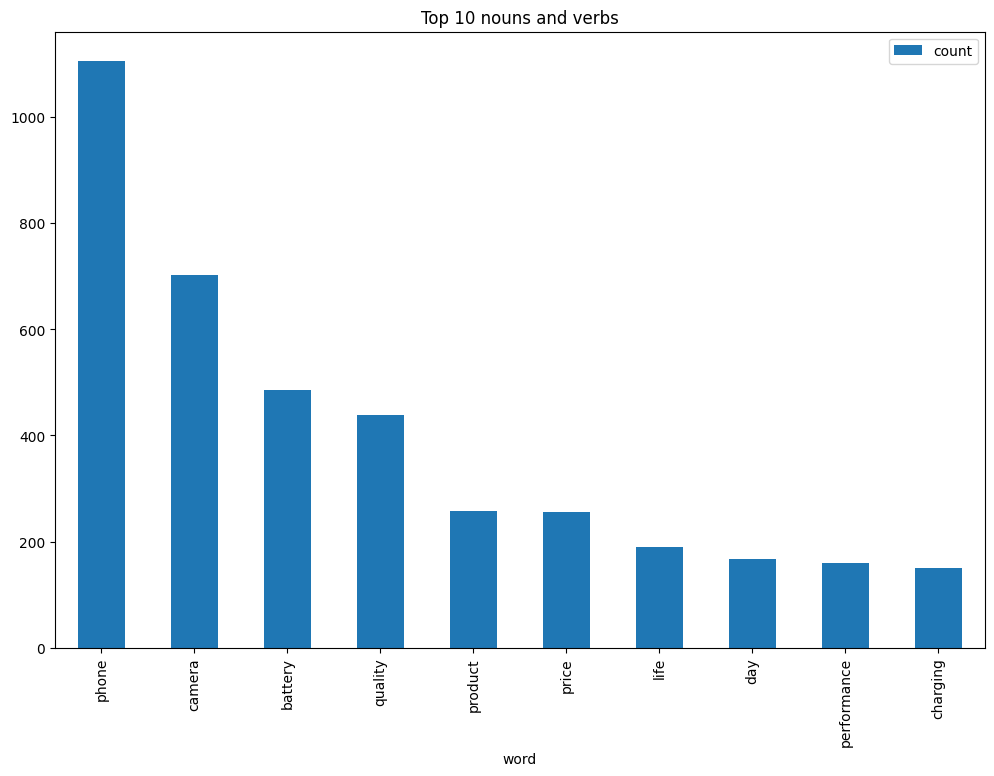

In [ ]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

0.1. __<a href='#0.1' target='_self'>Table of Contents:</a>__

## <a id='9'>9. Feature Extraction</a>

We need to convert textual representation in the form on numeric features. We have two popular techniques to perform feature extraction:

1. __Bag of words (Simple vectorization)__
2. __TF-IDF (Term Frequency - Inverse Document Frequency)__

We will use extracted features from both one by one to perform sentiment analysis and will compare the result at last.


### <a id='9Aa'>A. Feature Extraction for 'Key Words'</a>

In [ ]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

0.1. __<a href='#0.1' target='_self'>Table of Contents:</a>__

## <a id='10'>10. Fetch sentiments</a>
To proceed further, we need to know the sentiment type of every tweet, that can be done using two ways: <br/>
    __a. Using NLTK's SentimentIntensityAnalyzer (We'll refer as SIA)<br/>__
    __b. Using TextBlob<br/>__

In [ ]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

### <a id='10Aa'>a. Using NLTK's SentimentIntensityAnalyzer</a>

In [ ]:
sentiments_using_SIA = dataframe.cleaned.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,cleaned
pos,2363
neg,230


In [ ]:
dataframe.Clean_Reviews[8]

'function brand run smoothly'

In [ ]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,ive purchased version phone come extendable gb...,"{'neg': 0.074, 'neu': 0.71, 'pos': 0.217, 'com..."
1,try keep review short review perspective avera...,"{'neg': 0.107, 'neu': 0.738, 'pos': 0.155, 'co..."
2,posting review day usedpros battery good using...,"{'neg': 0.046, 'neu': 0.646, 'pos': 0.307, 'co..."
3,phone value money meanwhile cant experience on...,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp..."
4,purchased month camera quality battery backup ...,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou..."


In [ ]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,ive purchased version phone come extendable gb...,"{'neg': 0.074, 'neu': 0.71, 'pos': 0.217, 'com...",0.9790
1,try keep review short review perspective avera...,"{'neg': 0.107, 'neu': 0.738, 'pos': 0.155, 'co...",0.6189
2,posting review day usedpros battery good using...,"{'neg': 0.046, 'neu': 0.646, 'pos': 0.307, 'co...",0.9682
3,phone value money meanwhile cant experience on...,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.6249
4,purchased month camera quality battery backup ...,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...",0.7003


In [ ]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,ive purchased version phone come extendable gb...,"{'neg': 0.074, 'neu': 0.71, 'pos': 0.217, 'com...",0.9790,Positive
1,try keep review short review perspective avera...,"{'neg': 0.107, 'neu': 0.738, 'pos': 0.155, 'co...",0.6189,Positive
2,posting review day usedpros battery good using...,"{'neg': 0.046, 'neu': 0.646, 'pos': 0.307, 'co...",0.9682,Positive
3,phone value money meanwhile cant experience on...,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.6249,Positive
4,purchased month camera quality battery backup ...,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...",0.7003,Positive
...,...,...,...,...
2588,light weight smooth camera ok normal person ni...,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",0.2960,Positive
2589,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive
2590,ya like itall specification goodits small nega...,"{'neg': 0.23, 'neu': 0.435, 'pos': 0.335, 'com...",0.1779,Positive
2591,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive


In [ ]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot

positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()


def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]


def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace


freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.9/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



![newplot%20%281%29.png](attachment:newplot%20%281%29.png)

<Axes: xlabel='sentiment', ylabel='count'>

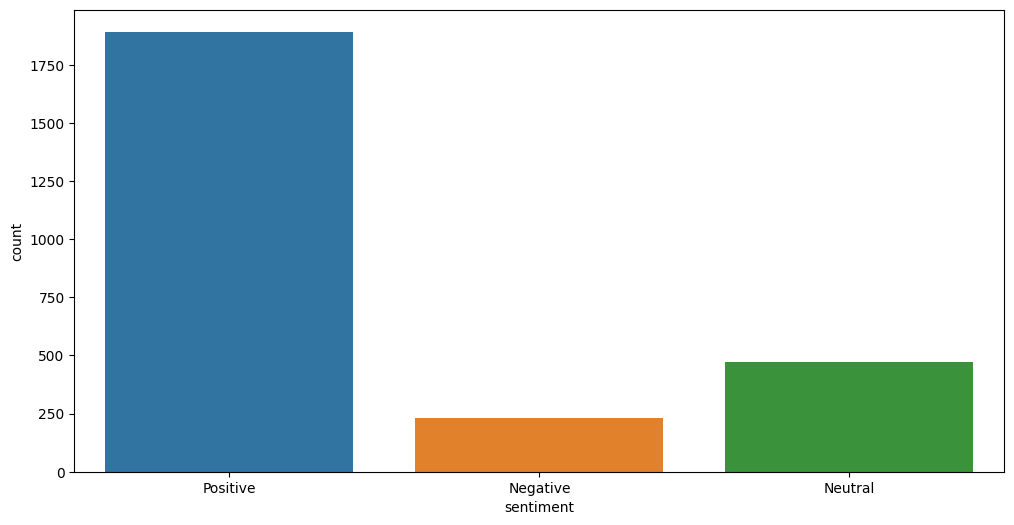

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

<ipython-input-126-b3e96d257d7c>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='compound', ylabel='Density'>

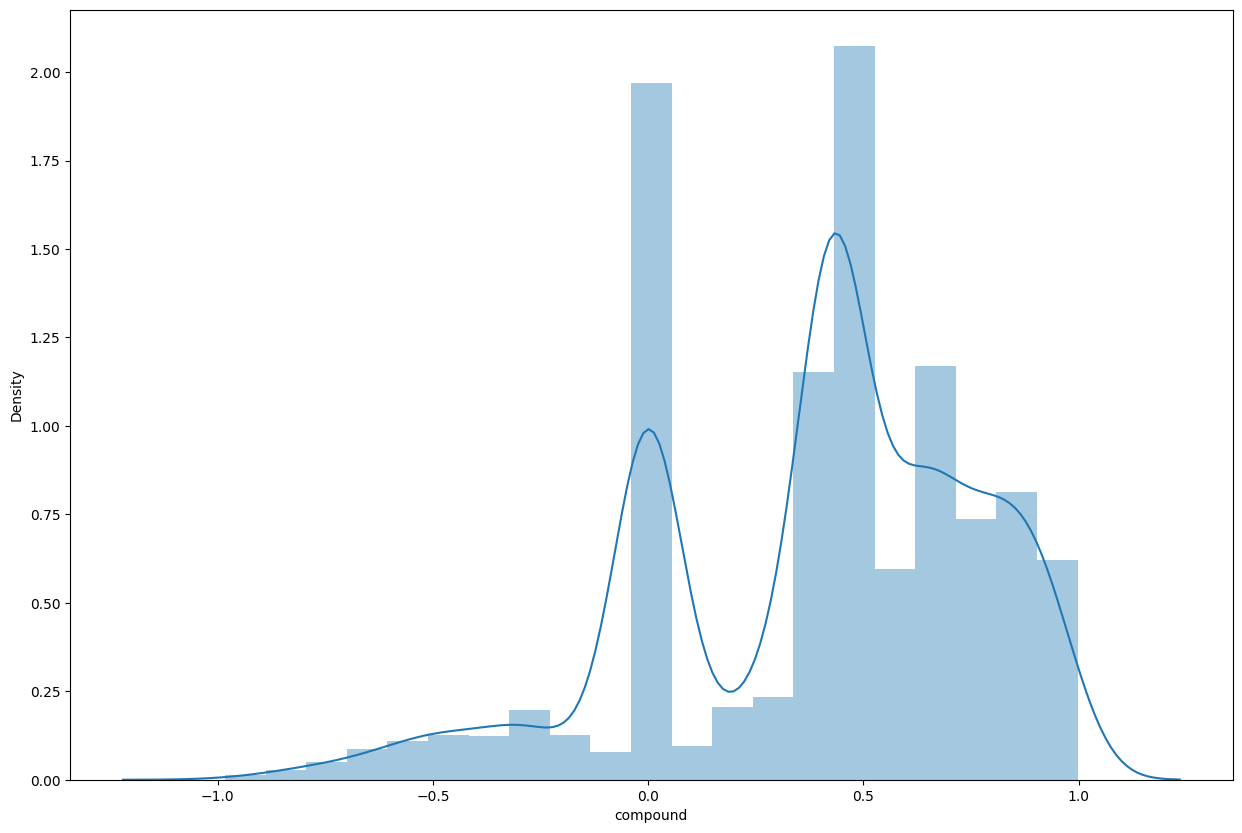

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

### <a id='10Ab'>b. Using TextBlob</a>

In [ ]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,2407
neg,186


In [ ]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Review,cleaned,Clean_Reviews,Subjectivity,Polarity
0,i've purchased 6gb version phone comes extenda...,ive purchased version phone come extendable ...,ive purchased version phone come extendable gb...,0.496970,0.160606
1,i try keep review short. this review perspecti...,try keep review short review perspective avera...,try keep review short review perspective avera...,0.528222,0.153722
2,"i posting review 7 days used,pros :battery goo...",posting review day usedpros battery good usin...,posting review day usedpros battery good using...,0.491026,0.469231
3,"this phone value money. meanwhile, can't exper...",phone value money meanwhile cant experience on...,phone value money meanwhile cant experience on...,0.283333,-0.158333
4,i purchased 2 months before. camera quality & ...,purchased month camera quality battery backup...,purchased month camera quality battery backup ...,0.600000,0.700000


Text(0, 0.5, 'Subjectivity')

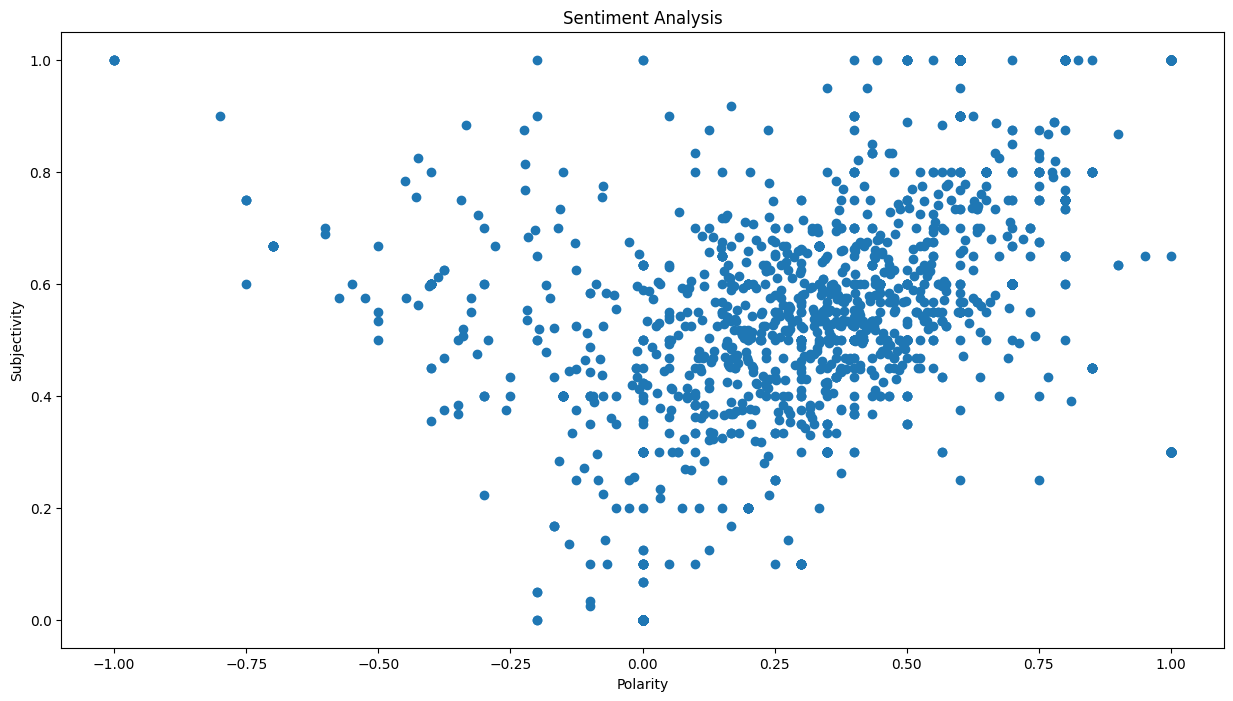

In [ ]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

![newplot.png](attachment:newplot.png)

##### *NLTK* gives us more negative sentiments than TexBlob, so we will prefer NLTK, since classfication seems better.

In [ ]:
dataframe['sentiment'] = sentiments_using_SIA
from google.colab import files
df.to_csv('outputsentiment.csv', encoding = 'utf-8-sig')
files.download('outputsentiment.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.1. __<a href='#0.1' target='_self'>Table of Contents:</a>__

## <a id='11'>11. Story Generation and Visualization</a>

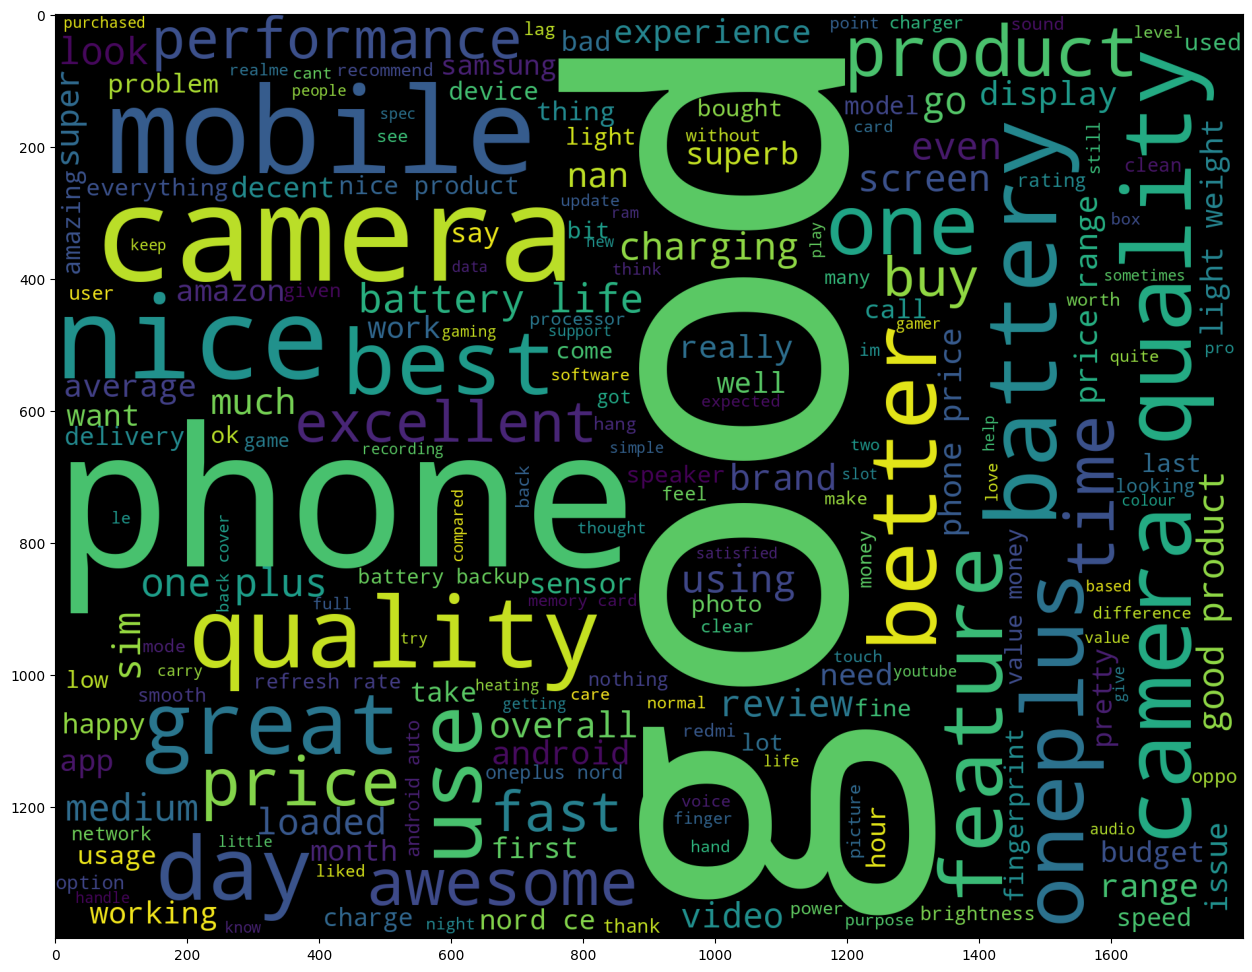

In [ ]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

### <a id='11A'>A. Most common words in positive Review</a>
Answer can be best found using WordCloud

In [ ]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

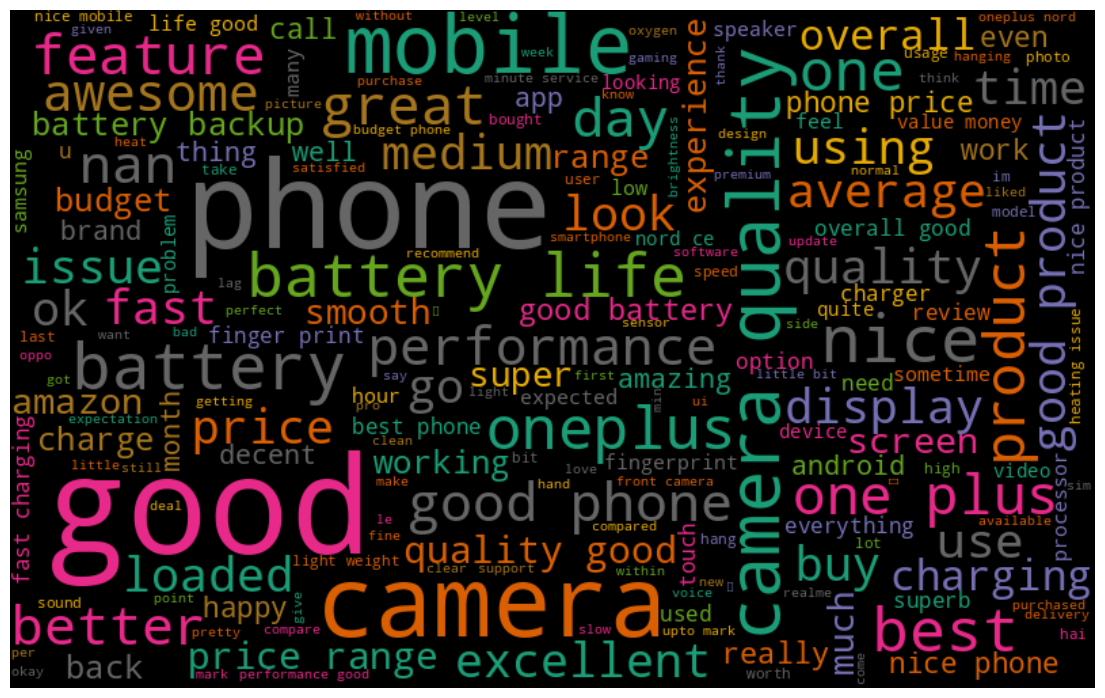

In [ ]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

### <a id='11B'>B. Most common words in negative Review</a>

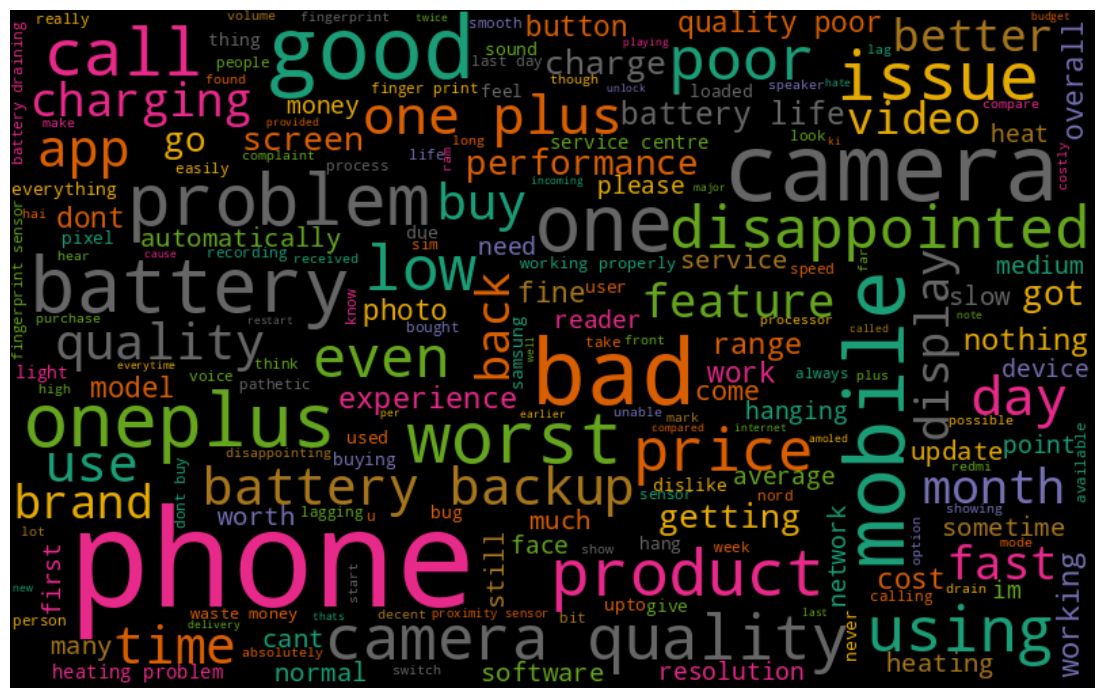

In [ ]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)